In [108]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

import pandas_datareader as pdr

In [109]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,12,30)
ticker_list = []

with open("Clean_titles.txt", "r") as f:
    for line in f:
        ticker_list.append(line[:-1])
        
data = pd.DataFrame(columns=ticker_list)
for ticker in ticker_list:
  data[ticker] = yf.download(ticker, start, end)['Close']
    
data = data.dropna(axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [110]:
index_r = pd.read_csv("Italia_40.csv", index_col="Дата")
index_r = index_r.drop('Цена', axis=1)
index_r = index_r.drop('Макс.', axis=1)
index_r = index_r.drop('Мин.', axis=1)
index_r = index_r.drop('Объём', axis=1)
index_r = index_r.drop('Изм. %', axis=1)
index_r = index_r.reindex(index=index_r.index[::-1])
index_r["Откр."] = index_r["Откр."].apply(lambda x: x.replace(",", ""))
index_r["Откр."] = pd.to_numeric(index_r["Откр."])
index_r.head()

,Откр.
Дата,
02.01.2017,1.8740
03.01.2017,1.9241
04.01.2017,1.9209
05.01.2017,1.9102
06.01.2017,1.9195


### 1. Efficient frontier. Выбрать на рынке набор из 50 акций.  Объясните ваш выбор. Построить эффективный фронт портфелей инвестиций без ограничений на короткие позиции и  эффективный фронт с запретом коротких позиций. Сравнить эффективные фронты и сделать выводы.  При построении эффективных фронтов вычислить портфели с минимальным риском и отметить их на соответствующем эффективном фронте. Рассмотреть портфель  с равными долями вложения капитала и оценить, как  далек этот портфель от эффективного фронта. Тот же вопрос для индекса рынка.

In [111]:
df = pd.DataFrame(columns=ticker_list)
for ticker in ticker_list:
  df[ticker] = yf.download(ticker, start, end)['Volume']
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,A2A.MI,ABT.MI,ACE.MI,AEF.MI,ADB.MI,ARN.MI,AMP.MI,ANIM.MI,ASC.MI,ATL.MI,...,TFI.MI,TB.MI,TXT.MI,UCG.MI,UNI.MI,US.MI,VLS.MI,WBD.MI,ZV.MI,ZUC.MI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+01:00,10979509,68600,80798,452371,18321,52276,408123,704682,98349,943738,...,124992,35000,51613,6738725,2853802,5979238,5901,1363312,23799,125566
2017-01-03 00:00:00+01:00,10625302,4200,88621,718412,13981,51586,730451,2101555,202374,1675025,...,258829,20000,30514,18536675,5193011,8741529,10283,1728143,47783,144770
2017-01-04 00:00:00+01:00,11785309,2800,83960,169833,16781,77628,402553,862574,108049,1263273,...,124824,7000,7732,12347196,3035637,8531844,12932,1766326,66925,45306
2017-01-05 00:00:00+01:00,8754392,0,84327,146746,11679,26572,454011,3669250,103900,2703428,...,137321,38000,43661,13300605,3159233,6786185,13817,853673,28103,35690
2017-01-06 00:00:00+01:00,6361706,12600,51664,58666,4089,24594,441504,2114155,58505,2077981,...,46932,6500,10042,11800999,3433734,5675117,2734,455999,9758,17933


Возьмем 50 активов с наибольшим объемом торгов

In [112]:
from numpy import size


volumes = dict()
for i in ticker_list:
    volumes[i] = df[i].sum()
    
sorted_dict = {}
sorted_keys = sorted(volumes, key=volumes.get)

for w in sorted_keys:
    sorted_dict[w] = volumes[w]

ticker_list_50 = list(sorted_dict.keys())[-50:]
size(ticker_list_50)



50

In [113]:
top_50 = data[ticker_list_50]
top_50.head()

,BZU.MI,BRE.MI,GEO.MI,RCS.MI,ENAV.MI,MONC.MI,IMS.MI,PRY.MI,LR.MI,ANIM.MI,...,JUVE.MI,A2A.MI,ENI.MI,RN.MI,STLA.MI,UCG.MI,BAMI.MI,ENEL.MI,TIT.MI,ISP.MI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+01:00,23.520000,12.00,2.248,0.8390,3.306,16.799999,0.3785,24.131235,0.3586,4.917725,...,0.281349,1.262,15.64,0.0333,8.917883,14.048960,2.500,4.222,0.8580,2.448
2017-01-03 00:00:00+01:00,23.020000,12.07,2.188,0.8495,3.356,16.670000,0.3770,23.541491,0.3670,4.955626,...,0.283836,1.261,15.63,0.0331,9.087179,14.069002,2.680,4.168,0.8515,2.504
2017-01-04 00:00:00+01:00,22.860001,11.83,2.158,0.8970,3.400,16.379999,0.3780,23.705847,0.3661,4.984052,...,0.286507,1.269,15.69,0.0343,9.151909,14.028919,2.720,4.174,0.8545,2.540
2017-01-05 00:00:00+01:00,22.910000,11.97,2.188,0.8995,3.402,16.340000,0.3837,23.638170,0.3875,5.197249,...,0.288717,1.265,15.64,0.0328,9.216640,14.079022,2.822,4.180,0.8425,2.558
2017-01-06 00:00:00+01:00,23.219999,12.02,2.166,0.8930,3.396,16.590000,0.3900,23.754187,0.3980,5.159347,...,0.289638,1.256,15.72,0.0341,9.858966,14.119105,2.900,4.162,0.8480,2.544


In [124]:
N = len(ticker_list_50)
n = top_50.shape[0] - 1
prices = top_50.values
prices = prices.transpose()
profitability = np.empty((N, n))

for i in range (N):
  for j in range (n):
    profitability[i][j] = math.log(prices[i][j+1]/prices[i][j])
means = np.empty(N)
vars = np.empty(N)   
 
for i in range(N):
  means[i] = statistics.mean(profitability[i])
  vars[i] = math.sqrt(statistics.variance(profitability[i]))

In [125]:
profitability_ = pd.DataFrame(profitability, index=ticker_list_50)


In [126]:
def covarience_matrix(log_returns: pd.DataFrame) -> pd.DataFrame:
    cov_matrix = log_returns.transpose().cov()
    return cov_matrix


cov_matrix = covarience_matrix(profitability_.loc[ticker_list_50])

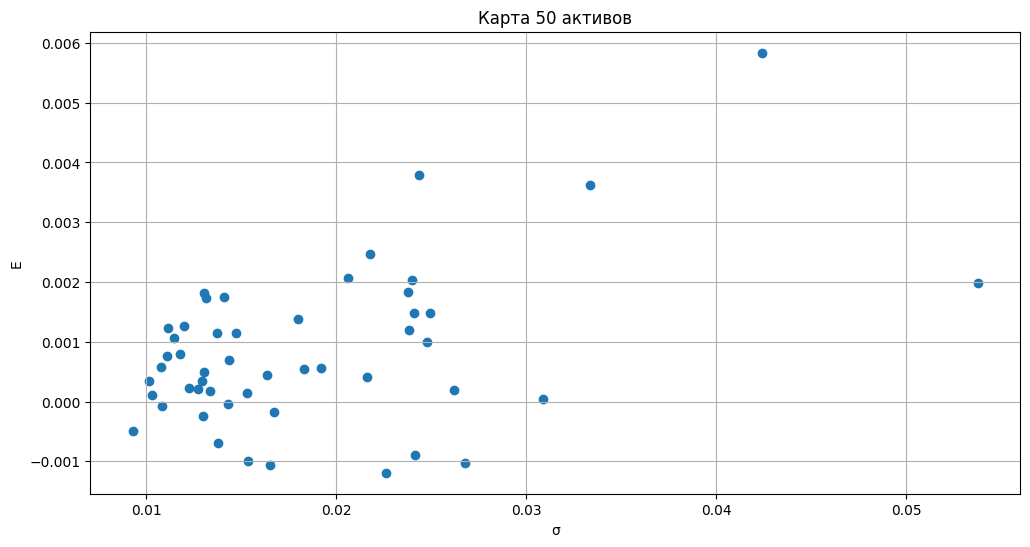

In [127]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта 50 активов")
plt.scatter(vars, means)

plt.show()

 - без ограничений на короткие позиции 

$$ \begin{cases} \sum \sum x_i x_j \sigma_{ij} \rightarrow  min \\ \sum x_i = 1 \end{cases} $$

In [148]:
from scipy.optimize import minimize

"""def risk_porfolio(X, cov_matrix, n_observations=1, sqrt=True):
    return np.sqrt(np.dot(np.dot(X, cov_matrix), X.T))
"""
def risk_porfolio(x, cov):
  return np.sqrt(np.dot(np.dot(x, cov), x.T))
    
def risk_porfolio_max(x, cov):
  return -np.sqrt(np.dot(np.dot(x, cov), x.T))

def optimize_portfolio(mean_returns, cov_matrix, bounds, target_return=None, risk_max=False):
    '''оптимизатор с итеративным методом МНК SLSQP
    решает задачу мимнимизации уравнения Лагранжа''' 
    
    
    X = np.ones(cov_matrix.shape[0])
    X = X / X.sum()
    bounds = bounds * cov_matrix.shape[0]

    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    if target_return:
        constraints.append({'type': 'eq', 'fun': lambda X: np.dot(X, mean_returns) - target_return})
        
    if risk_max: 
        out = minimize(risk_porfolio_max, X, args=(cov_matrix), method='SLSQP', constraints=constraints, bounds=bounds).x
    else:
        out = minimize(risk_porfolio, X, args=(cov_matrix), method='SLSQP', constraints=constraints, bounds=bounds).x
    return out


In [156]:
bounds = ((None, None),) 
x_min_risk = optimize_portfolio(means, cov_matrix, bounds)
min_risk = risk_porfolio(x_min_risk, cov_matrix)
mean_min_risk = np.dot(x_min_risk, means)

means_ = np.linspace(mean_min_risk, 0.02, 50)
p_with_short = []
for m in means_:
  x = optimize_portfolio(means, cov_matrix, bounds, m)
  risk = risk_porfolio(x, cov_matrix)
  mean = np.dot(x, means)
  p_with_short.append((risk, m))
  
front_risk, front_mean = [p[0] for p in p_with_short], [p[1] for p in p_with_short]

In [157]:
print("Портфель с минимальным риском:\n"+
      f"Средняя доходность - {mean_min_risk}\n"+
      f"              Риск - {min_risk}")

Портфель с минимальным риском:
Средняя доходность - 0.000543342760214668
              Риск - 0.005309003303716099


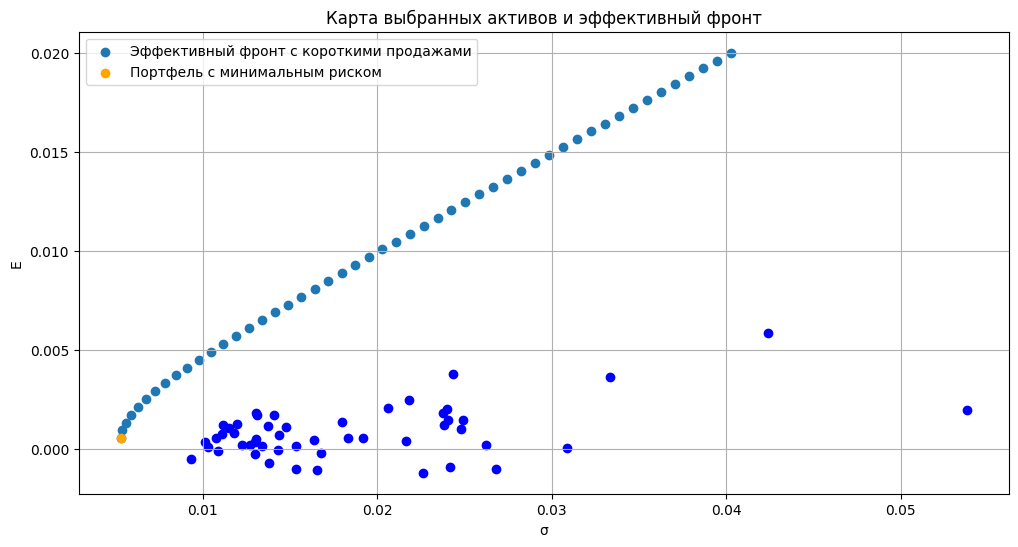

In [158]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта выбранных активов и эффективный фронт")

plt.scatter(front_risk, front_mean, label="Эффективный фронт с короткими продажами")
plt.scatter(vars, means, color="blue")
plt.scatter(min_risk, mean_min_risk, c='orange', label="Портфель с минимальным риском")

plt.legend()
plt.show()

описание

 -  с запретом  - коротких позиций.
$$ \begin{cases} \sum \sum x_i x_j \sigma_{ij} \rightarrow  min \\ \sum x_i = 1 \\ x_i > 0 \quad \forall i\end{cases} $$

In [163]:
bounds = ((0.0, 1.0),) 

x_min_risk_ns = optimize_portfolio(means, cov_matrix, bounds)
min_risk_ns = risk_porfolio(x_min_risk_ns, cov_matrix)
mean_min_risk_ns = np.dot(x_min_risk_ns, means)

x_max_risk_ns = optimize_portfolio(means, cov_matrix, bounds, risk_max=True)
max_risk_ns = risk_porfolio(x_max_risk_ns, cov_matrix)
mean_max_risk_ns = np.dot(x_max_risk_ns, means)

means_ns = np.linspace(mean_min_risk_ns, 0.01, 50)
p_with_short = []
for m in means_ns:
    x = optimize_portfolio(means, cov_matrix, bounds, m)
    risk = risk_porfolio(x, cov_matrix)
    mean = np.dot(x, means)
    p_with_short.append((risk, m))

front_risk_ns, front_mean_ns = [p[0] for p in p_with_short], [p[1] for p in p_with_short]

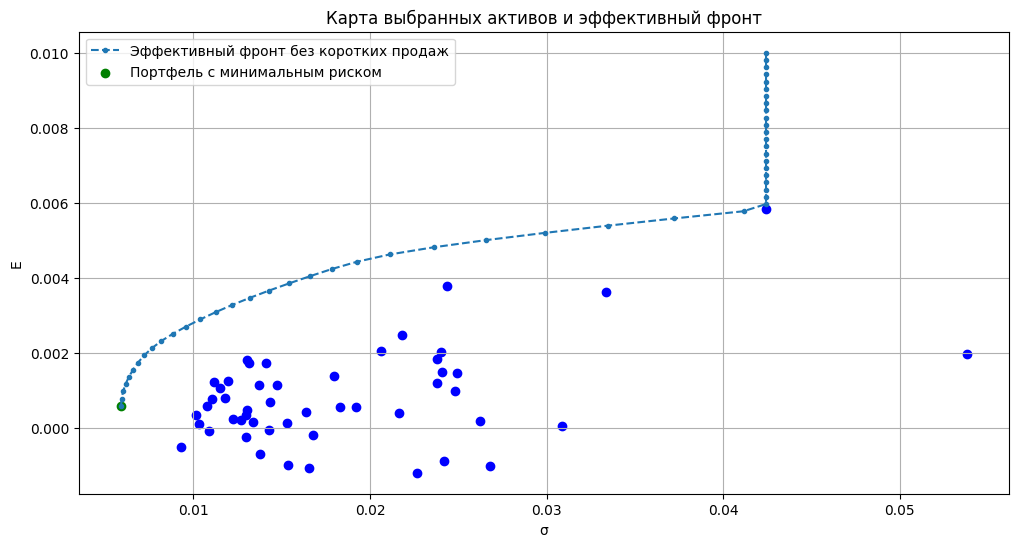

In [164]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта выбранных активов и эффективный фронт")

plt.plot(front_risk_ns, front_mean_ns,'.--', label="Эффективный фронт без коротких продаж")
plt.scatter(vars, means, color="blue")
plt.scatter(min_risk_ns, mean_min_risk_ns, c='green', label="Портфель с минимальным риском")

plt.legend()
plt.show()

### 2. Portfolio selection problem. Требуется построить «хорошие» инвестиционные портфели из 10 активов вместо исходных 50 (или даже всех активов рынка). Предложите способ выбрать 10 активов (из отобранных ранее 50) для формирования портфеля. Сравните эффективные фронты всего набора (50 акций)  и выбранного набора активов (10 акций) для двух случаев
- короткие продажи разрешены, 
- короткие продажи запрещены.


### 3. Risk aversion. Оцените свое отношение к риску и постройте свой личный оптимальный портфель инвестиций из выбранных 50 активов.  Дайте характеристику портфеля по составу и долям активов. Оцените VaR доходностей портфеля. Рассмотрите два случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.


### 4. Risk aversion  and Portfolio selection. Используя выбранное  в п.3 отношение к риску постройте  оптимальный портфель из 10 активов (вместо 50, см. п.2). Дайте характеристику этого портфеля по составу активов и долям инвестиций. Сравните с портфелем п.3. Оцените VaR доходностей портфеля. Рассмотрите два случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.
Можно ли ваш портфель из 10 активов улучшить, оставаясь в рамках 10 активов из выбранных ранее 50 активов?

### 5. Markowitz-Tobin model. Рассмотрите набор активов, отобранных в п.2 (10 активов).  Выберете  безрисковый актив (можно виртуальный). Постройте рыночный (оптимальный)  портфель. Сделайте анализ долей активов рыночного портфеля. Оцените VaR доходностей портфеля. Рассмотрите два случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.
